# GEFCOM2017 Data Exploration Notebook

To run this notebook, please download GEFCom 2017 dataset by executing these commands from the root folder of TSPerf:
    
    conda env create --file ./common/conda_dependencies.yml
    source activate tsperf
    python energy_load/GEFCom2017_D_Prob_MT_hourly/common/download_data.py
    python energy_load/GEFCom2017_D_Prob_MT_hourly/common/extract_data.py

Install dependencies

In [89]:
!pip install patsy
!pip install statsmodels

In [46]:
import os
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

train_data_dir = '../data/train'
test_data_dir = '../data/test'

Combine train_base.csv and train_round_6.csv to get the entire training dataset. 

In [3]:
train_base = pd.read_csv(os.path.join(train_data_dir, 'train_base.csv'),parse_dates=['Datetime'])
train_round_6 = pd.read_csv(os.path.join(train_data_dir, 'train_round_6.csv'),parse_dates=['Datetime'])
train_all = pd.concat([train_base, train_round_6]).reset_index(drop=True)
train_all

,Datetime,DEMAND,DewPnt,DryBulb,Zone,Holiday
0,2011-01-01 00:00:00,1048.000,28,31,ME,0
1,2011-01-01 00:00:00,1044.000,26,28,NH,0
2,2011-01-01 00:00:00,575.000,35,43,VT,0
3,2011-01-01 00:00:00,3053.000,27,33,CT,0
4,2011-01-01 00:00:00,775.000,28,31,RI,0
5,2011-01-01 00:00:00,1438.000,28,31,SEMA,0
6,2011-01-01 00:00:00,1649.000,33,41,WCMA,0
7,2011-01-01 00:00:00,2474.000,29,41,NEMA,0
8,2011-01-01 00:00:00,5561.000,30,38,MA_TOTAL,0
9,2011-01-01 00:00:00,12056.000,29,35,TOTAL,0


Check if there are missing values in any of the columns

In [4]:
print("Number of missing values: {}".format(train_all.isna().sum().sum()))

Number of missing values: 0


Summary of the distribution of values of numeric columns

In [5]:
train_all.describe()

,DEMAND,DewPnt,DryBulb,Holiday
count,533520.000000,533520.000000,533520.000000,533520.000000
mean,3520.982876,38.473889,50.123270,0.149348
std,4093.774479,19.852379,19.047758,1.009273
min,226.000000,-29.000000,-20.000000,0.000000
25%,1163.320000,24.000000,35.000000,0.000000
50%,1824.438500,40.000000,51.000000,0.000000
75%,3628.000000,55.000000,65.000000,0.000000
max,27334.000000,78.000000,102.000000,10.000000


Show all distinct zones and their timespans

In [6]:
train_all.groupby('Zone')['Datetime'].agg([np.min, np.max]).reset_index().\
          rename(columns={'amin':'min time', 'amax':'max time'})

,Zone,min time,max time
0,CT,2011-01-01,2017-01-31 23:00:00
1,MA_TOTAL,2011-01-01,2017-01-31 23:00:00
2,ME,2011-01-01,2017-01-31 23:00:00
3,NEMA,2011-01-01,2017-01-31 23:00:00
4,NH,2011-01-01,2017-01-31 23:00:00
5,RI,2011-01-01,2017-01-31 23:00:00
6,SEMA,2011-01-01,2017-01-31 23:00:00
7,TOTAL,2011-01-01,2017-01-31 23:00:00
8,VT,2011-01-01,2017-01-31 23:00:00
9,WCMA,2011-01-01,2017-01-31 23:00:00


show summary of the distribution of DEMAND values across zones

In [7]:
train_all.groupby('Zone')['DEMAND'].agg([np.mean, np.min, np.max]).\
          rename(columns={'mean':'mean demand', 'amin':'min demand', 'amax':'max demand'}).\
          sort_values(by='mean demand').reset_index()

,Zone,mean demand,min demand,max demand
0,VT,651.190780,226.0,985.0
1,RI,932.365849,292.0,1967.0
2,ME,1308.564726,466.0,2135.0
3,NH,1328.804434,411.0,2433.0
4,SEMA,1703.738470,525.0,3645.0
5,WCMA,1975.466045,630.0,3650.0
6,NEMA,2904.959775,951.0,5658.0
7,CT,3507.742128,1084.0,7219.0
8,MA_TOTAL,6584.164328,2107.0,12891.0
9,TOTAL,14312.832227,4604.0,27334.0


### Compute correlations between different features

In [42]:
train_all[['DEMAND','DewPnt','DryBulb','Holiday']].corr()

,DEMAND,DewPnt,DryBulb,Holiday
DEMAND,1.000000,0.024353,0.050296,-0.005875
DewPnt,0.024353,1.000000,0.902049,-0.012264
DryBulb,0.050296,0.902049,1.000000,-0.018461
Holiday,-0.005875,-0.012264,-0.018461,1.000000


This table shows that DewPnt and DryBulb features are highly correlated. 

### Visualize seasonalities in energy demand

In this section we show that DEMAND data has multiple seasonalities

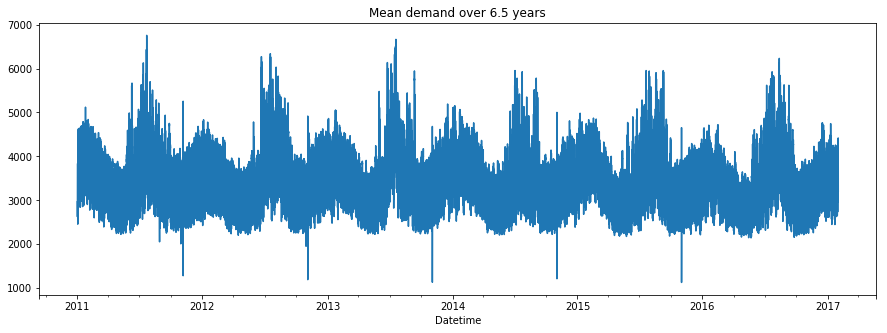

In [9]:
mean_demand = train_all.groupby('Datetime')['DEMAND'].mean()
mean_demand.plot(title="Mean demand over 6.5 years")

#### Hourly seasonality

The following graph shows that mean energy consumption has hourly seasonality. Energy consumption peaks around noon and then around 6pm. Also energy consumption drops significantly at night.

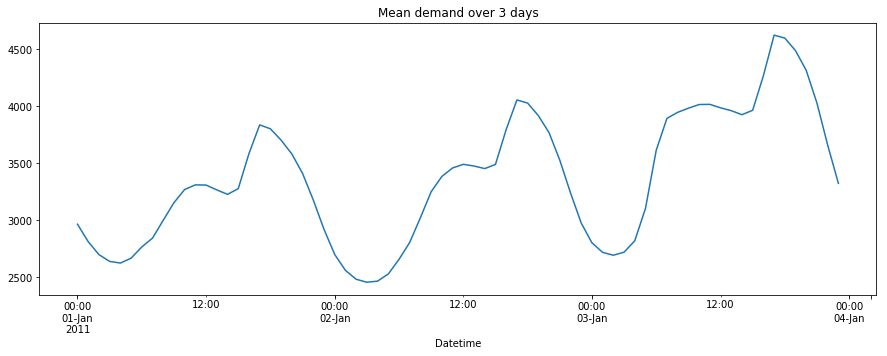

In [10]:
mean_demand[:24*3].plot(title="Mean demand over 3 days")

#### Daily seasonality

The following graph shows that mean energy consumption has daily seasonality. Energy consumption is higher at week days (January 3-7, January 10-14, January 17-22) and lower during weekend (January 1-2, January 8-9, January 15-16).

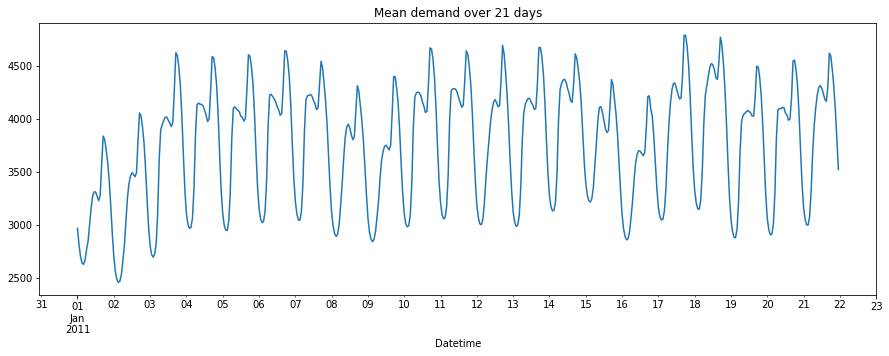

In [11]:
mean_demand[:24*21].plot(title="Mean demand over 21 days")

In [12]:
mean_total_daily_demand = mean_demand.resample('24h').sum()
weekday_mean_total_demand = mean_total_daily_demand[mean_total_daily_demand.index.dayofweek<5].mean()
weekend_mean_total_demand = mean_total_daily_demand[mean_total_daily_demand.index.dayofweek>=5].mean()
print('Total demand during weekday: {0:.2f} (averaged over all zones and weekdays)'.format(weekday_mean_total_demand))
print('Total demand during weekend day: {0:.2f} (averaged over all zones and weekend days)'.format(weekend_mean_total_demand))

Total demand during weekday: 86782.03 (averaged over all zones and weekdays)
Total demand during weekend day: 78818.23 (averaged over all zones and weekend days)


#### Monthly seasonality

The following graph shows that mean energy consumption has monthly seasonality. Energy consumption increases in winter and summer and decreases in spring and fall.

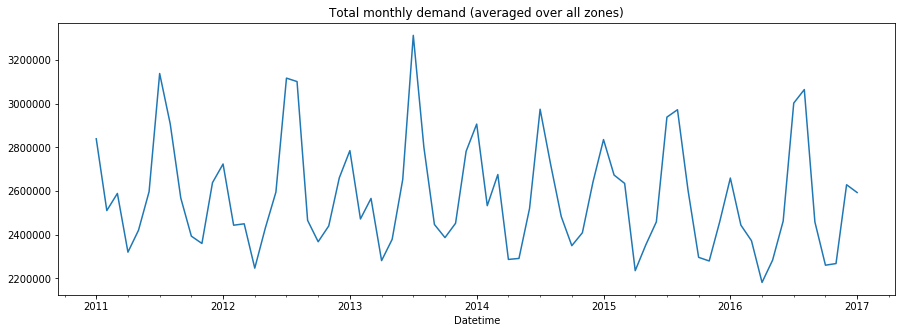

In [13]:
mean_demand.resample('1m').sum().plot(title="Total monthly demand (averaged over all zones)")

### Compute partial autocorrelation

The following plot shows partial autocorrelation with of the lags up to 24 hours * 14 days = 2 weeks

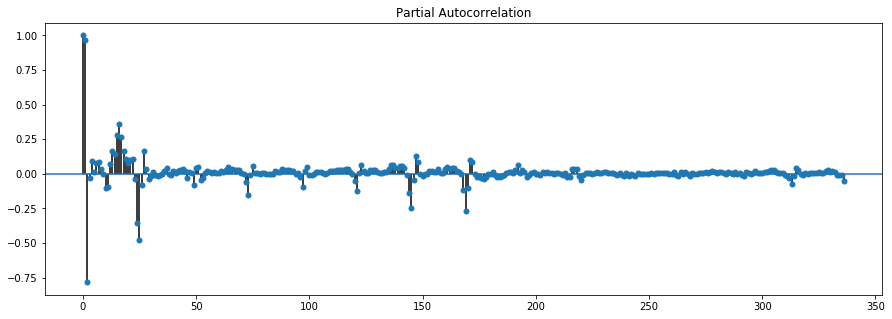

In [53]:
plot_pacf(mean_demand, lags=24*14)
plt.show()

This graph shows that most of the lags are not correlated. In the next cell we find 20 lags with the largest partial autocorrelation.

In [71]:
pacf_values, pacf_conf_intervals = pacf(mean_demand, nlags=24*14, alpha=0.05)
top20_lags = np.argsort(np.abs(pacf_values))[-2::-1][:20]
print(top20_lags)

[  1   2  25  16  24  15 169  17 145  13  27  18  73  14 144 147 121 168
  19  22]


The lags with the highest correlation are from today (lags 1,2,13-19), from about a day ago (lags 22, 24, 25, 27), from 3 days ago (lag 73), from 6 days ago (lags 144, 145, 147) and from 7 days ago (lags 168, 169).

95% confidence intervals of 20 lags with the largest partial autocorrelation:

In [88]:
pacf_conf_intervals[top20_lags]

array([[ 0.95700344,  0.97397425],
       [-0.79290758, -0.77593676],
       [-0.48986384, -0.47289303],
       [ 0.35485676,  0.37182757],
       [-0.36515857, -0.34818776],
       [ 0.26912724,  0.28609805],
       [-0.27624145, -0.25927063],
       [ 0.256673  ,  0.27364382],
       [-0.25636719, -0.23939638],
       [ 0.15484823,  0.17181904],
       [ 0.15448782,  0.17145863],
       [ 0.15333357,  0.17030439],
       [-0.162287  , -0.14531618],
       [ 0.13648539,  0.15345621],
       [-0.14641572, -0.1294449 ],
       [ 0.1191503 ,  0.13612111],
       [-0.12967532, -0.1127045 ],
       [-0.12728316, -0.11031234],
       [ 0.10020409,  0.11717491],
       [ 0.09950764,  0.11647846]])

The 95% confidence intervals of partial correlations of these lags do not contain zeros. Hence all these lags have statistically significant partial autocorrelation.

This analysis suggests to use these lags when developing feature sets of energy demand forecasting models.